# Cogs 118C, Spring 2020


## HW2

Name: Malachi Mabie

Student ID: A15737533

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scipy

# 1. ERP Statistics

In [9]:
"""
ERP experiment with a stimulus flashed for ~1s while recording EEG at one electrode.
This is repeated as 20 trials.
Each column is one trial. For each trial, there are 201 time points between -5 and +5 seconds - steps of 50ms.
The values are in units of microVolts.
""" 
ERP_df = pd.read_csv('hw2.csv', sep=',',header=None)
ERP_df.head()


201

a) Sampling rate: $Fs = 20 Hz$

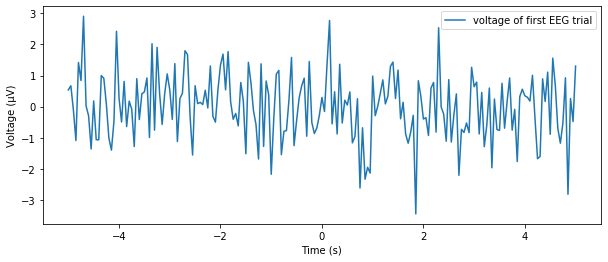

In [16]:
# b) make a plot showing voltage of first trial vs time
t = np.arange(-5, 5.02, .05)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, ERP_df[0], label=r"voltage of first EEG trial")
ax.legend()

plt.xlabel('Time (s)')
plt.ylabel('Voltage (\u03BCV)')
plt.show()

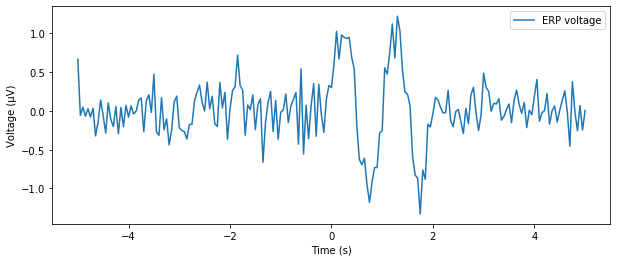

In [19]:
# c) plot the average of all 20 trials. This is the ERP.
t = np.arange(-5, 5.02, .05)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, ERP_df.mean(axis=1), label=r"ERP voltage")
ax.legend()

plt.xlabel('Time (s)')
plt.ylabel('Voltage (\u03BCV)')
plt.show()

In [39]:
# d) t-test: determine whether ERP is statistically significant at t = -5. (test null hypothesis ERP = 0)

scipy.ttest_1samp(ERP_df.transpose()[0], 0.0)

Ttest_1sampResult(statistic=2.0086085640507, pvalue=0.059006248858939694)

[0.059006248858939694, 0.8339991455616557, 0.7861255966166019, 0.7752158967896496, 0.9117739499406303, 0.7486242720569023, 0.8939949563589588, 0.11051724700190335, 0.5923081630036414, 0.41588606428759567, 0.7354665855039164, 0.2386257959476533, 0.671892142172954, 0.5942067955937944, 0.4797227241248322, 0.7687597718161197, 0.2513211063362185, 0.8263324960666462, 0.28406027102832637, 0.7629607798268071, 0.6721308059047074]


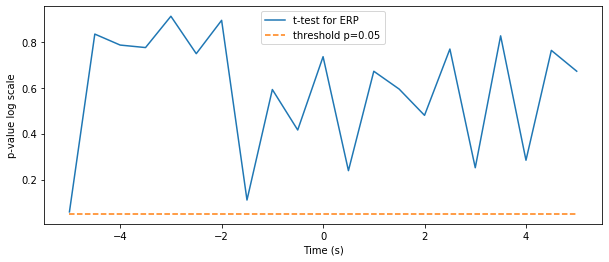

In [89]:
# e) repeat t test for each time point; plot p value vs time.
p_vals = []
for x in range(21):
    p_vals.append(scipy.ttest_1samp(ERP_df.transpose()[x], 0.0)[1])
print(p_vals)

# plot p-val array
t = np.arange(-5, 5.02, .5)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, p_vals, label=r"t-test for ERP")
# plot threshold
threshold = .05 # p-value threshold
ax.plot(t,np.zeros(21)+threshold,'--', label=r"threshold p=0.05")
# make y log scale
#plt.yscale(value="log")

ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('p-value log scale')
plt.show()
# TODO: this graph is incorrect and should have a bunch of points

In [ ]:
# f) 